# Generating Gowdy cosmological models by Sanchez, Macias and Quevedo
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 15, 2022

https://arxiv.org/abs/gr-qc/0312083

Will come back and do transformation that takes this metric to Gowdy.  NOT FINISHED

In [74]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [75]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [76]:
T,rho,phi,z,dT,drho,dphi,dz = symbols('T rho phi z dT drho dphi dz')

In [77]:
psi = Function('psi')(rho,z)
psi

In [78]:
omega = Function('omega')(rho,z)
omega

In [79]:
gamma = Function('gamma')(rho,z)
gamma

In [80]:
variables = Matrix([T,phi,rho,z])
variables

⎡T⎤
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎣z⎦

In [81]:
differentials = Matrix([dT,dphi,drho,dz])
differentials 

⎡ dT ⎤
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎣ dz ⎦

In [82]:
lineElement = expand(- exp(2*psi)*(dT + omega * dphi)**2 + exp(-2*psi) * (exp(2*gamma)* ( drho**2 + dz**2) + rho**2 * dphi**2))
lineElement

In [83]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡      2⋅ψ(ρ, z)                        2⋅ψ(ρ, z)                                           
⎢    -ℯ                       -ω(ρ, z)⋅ℯ                              0                     
⎢                                                                                           
⎢          2⋅ψ(ρ, z)   2  -2⋅ψ(ρ, z)    2        2⋅ψ(ρ, z)                                  
⎢-ω(ρ, z)⋅ℯ           ρ ⋅ℯ           - ω (ρ, z)⋅ℯ                     0                     
⎢                                                                                           
⎢                                                            2⋅γ(ρ, z)  -2⋅ψ(ρ, z)          
⎢         0                            0                    ℯ         ⋅ℯ                    
⎢                                                                                           
⎢                                                                                    2⋅γ(ρ, 
⎣         0                            0                              

In [84]:
import sympy

In [85]:
m = sympy.Array(g)
m

⎡      2⋅ψ(ρ, z)                        2⋅ψ(ρ, z)                                           
⎢    -ℯ                       -ω(ρ, z)⋅ℯ                              0                     
⎢                                                                                           
⎢          2⋅ψ(ρ, z)   2  -2⋅ψ(ρ, z)    2        2⋅ψ(ρ, z)                                  
⎢-ω(ρ, z)⋅ℯ           ρ ⋅ℯ           - ω (ρ, z)⋅ℯ                     0                     
⎢                                                                                           
⎢                                                            2⋅γ(ρ, z)  -2⋅ψ(ρ, z)          
⎢         0                            0                    ℯ         ⋅ℯ                    
⎢                                                                                           
⎢                                                                                    2⋅γ(ρ, 
⎣         0                            0                              

In [86]:
from einsteinpy.symbolic import *

In [87]:
syms = sympy.symbols("T phi rho z")
T,phi,rho,z = syms

In [88]:
metric = MetricTensor(m,syms)

In [89]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                                                          
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                     0                                                               0    
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                     0                                              

In [90]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                ⎛          
⎢                                                                                ⎜          
⎢                                                                                ⎜     2    
⎢                                                                                ⎜ 2  ∂     
⎢                                                                                ⎜ρ ⋅───(ψ(ρ
⎢                                                                                ⎜     2    
⎢                                                                                ⎝   ∂ρ     
⎢                                                                                ───────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

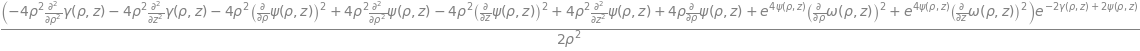

In [91]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [92]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                    ⎛      
⎢                                                                                    ⎜      
⎢                                                                                    ⎜     2
⎢                                                                                    ⎜ 2  ∂ 
⎢                                                                                    ⎜ρ ⋅───
⎢                                                                                    ⎜     2
⎢                                                                                    ⎝   ∂ρ 
⎢                                                                                    ───────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [93]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [94]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [95]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified 

⎡                                                                                ⎛          
⎢                                                                                ⎜          
⎢                                                                                ⎜     2    
⎢                                                                                ⎜ 2  ∂     
⎢                                                                                ⎜ρ ⋅───(ψ(ρ
⎢                                                                                ⎜     2    
⎢                                                                                ⎝   ∂ρ     
⎢                                                                                ───────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [96]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎛               2                         2                                    2           
⎢⎜   2          ∂              2          ∂              2         ⎛∂ 

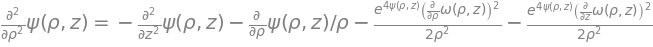

In [97]:
equation2 = Eq(diff(psi,rho,rho),expand(solve(ricciSimplified[0,0].args[1],diff(psi,rho,rho) )[0]))
equation2 

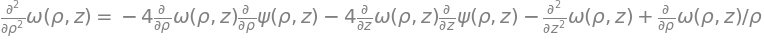

In [98]:
#  I have no idea why this is off..... 
equation3 = Eq(diff(omega,rho,rho),solve( ricciSimplified[1,0].args[2].subs(equation2.lhs,equation2.rhs).expand(), diff(omega,rho,rho) )[0])
equation3

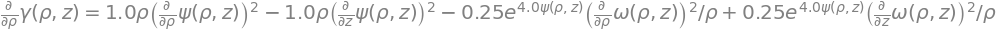

In [113]:
equation4 = Eq( diff(gamma,rho),expand(solve( simplify(einsteinSimplified[2,2] - einsteinSimplified[3,3]), diff(gamma,rho) )[0]) )
equation4 

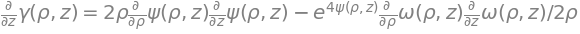

In [108]:
equation5 = Eq(diff(gamma,z),solve( einsteinSimplified[2,3], diff(gamma,z) )[0] )
equation5

In [115]:
vacuumFieldEquations = Matrix([equation2,equation3,equation4,equation5])
vacuumFieldEquations

⎡                                                                                  2        
⎢                                            ∂              4⋅ψ(ρ, z) ⎛∂          ⎞     4⋅ψ(
⎢              2                2            ──(ψ(ρ, z))   ℯ         ⋅⎜──(ω(ρ, z))⎟    ℯ    
⎢             ∂                ∂             ∂ρ                       ⎝∂ρ         ⎠         
⎢            ───(ψ(ρ, z)) = - ───(ψ(ρ, z)) - ─────────── - ───────────────────────── - ─────
⎢              2                2                 ρ                      2                  
⎢            ∂ρ               ∂z                                      2⋅ρ                   
⎢                                                                                           
⎢                                                                                           
⎢              2                                                                        2   
⎢             ∂                 ∂           ∂               ∂         